In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

import os
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
def read_csv(file_name):
    return pd.read_csv(file_name)



# Yad2 cleaning data

In [19]:
yad2_df = read_csv('raw_yad2_data.csv')
yad2_df.head()

,Post link,City,Neighborhood,Size,Number of rooms,Floor number,Taxes,Price,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,dks8vn48,חדרה,גבעת אולגה,127,4.0,5.0,980.0,4700.0,1,1,1,1,1,1.0,1,1,1,1,1,1
1,jmjfaz37,חיפה,"יל""ג",65,3.5,1.0,NaN,2400.0,1,1,1,1,0,NaN,1,1,1,1,1,1
2,iphkc13r,רמות ספיר,"שכונה י""א",70,3.0,1.0,400.0,2450.0,1,1,1,1,1,NaN,1,1,1,1,1,1
3,9chmff31,קרית אתא,מרכז העיר,70,3.0,1.0,500.0,2900.0,1,1,1,1,0,NaN,1,1,1,1,1,1
4,yp7la93q,מגדל העמק,רמת בלפור,80,3.5,3.0,512.0,2095.0,1,1,1,1,1,NaN,1,1,1,1,1,1


In [20]:
yad2_df.shape

(9110, 20)

In [22]:
yad2_df.drop_duplicates(['Post link'], inplace=True)
yad2_df.shape
yad2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6650 entries, 0 to 9109
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Post link        6650 non-null   object 
 1   City             6650 non-null   object 
 2   Neighborhood     6650 non-null   object 
 3   Size             6650 non-null   int64  
 4   Number of rooms  6647 non-null   float64
 5   Floor number     6249 non-null   float64
 6   Taxes            2939 non-null   float64
 7   Price            6347 non-null   float64
 8   Room mates       6650 non-null   int64  
 9   Furniture        6650 non-null   int64  
 10  Elevator         6650 non-null   int64  
 11  Air conditioner  6650 non-null   int64  
 12  Parking          6650 non-null   int64  
 13  Balcony          3026 non-null   float64
 14  Bars             6650 non-null   int64  
 15  Shelter          6650 non-null   int64  
 16  Storeroom        6650 non-null   int64  
 17  Renovated     

In [23]:
yad2_df.dropna(subset=['Price', 'Number of rooms'], inplace=True)
yad2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6344 entries, 0 to 9109
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Post link        6344 non-null   object 
 1   City             6344 non-null   object 
 2   Neighborhood     6344 non-null   object 
 3   Size             6344 non-null   int64  
 4   Number of rooms  6344 non-null   float64
 5   Floor number     5960 non-null   float64
 6   Taxes            2866 non-null   float64
 7   Price            6344 non-null   float64
 8   Room mates       6344 non-null   int64  
 9   Furniture        6344 non-null   int64  
 10  Elevator         6344 non-null   int64  
 11  Air conditioner  6344 non-null   int64  
 12  Parking          6344 non-null   int64  
 13  Balcony          2871 non-null   float64
 14  Bars             6344 non-null   int64  
 15  Shelter          6344 non-null   int64  
 16  Storeroom        6344 non-null   int64  
 17  Renovated     

In [27]:
yad2_df.drop(['Post link', 'Taxes'], axis=1, inplace=True)

In [28]:
yad2_df['Floor number'].fillna(value=yad2_df['Floor number'].median(), inplace=True)
yad2_df['Balcony'].fillna(value=0, inplace=True)
yad2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6344 entries, 0 to 9109
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             6344 non-null   object 
 1   Neighborhood     6344 non-null   object 
 2   Size             6344 non-null   int64  
 3   Number of rooms  6344 non-null   float64
 4   Floor number     6344 non-null   float64
 5   Price            6344 non-null   float64
 6   Room mates       6344 non-null   int64  
 7   Furniture        6344 non-null   int64  
 8   Elevator         6344 non-null   int64  
 9   Air conditioner  6344 non-null   int64  
 10  Parking          6344 non-null   int64  
 11  Balcony          6344 non-null   float64
 12  Bars             6344 non-null   int64  
 13  Shelter          6344 non-null   int64  
 14  Storeroom        6344 non-null   int64  
 15  Renovated        6344 non-null   int64  
 16  Boiler           6344 non-null   int64  
 17  Pets allowed  

# Homeless

In [35]:
homeless_df = read_csv('raw_homeless_data.csv')
homeless_df.head()

,Page number,City,Neighborhood,Size,Number of rooms,Floor number,Taxes,Price,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,685019,חיפה,נוה שאנן,80.0,3.0,3.0,1150,3400.0,0,1,0,1,0,0,0,0,0,1,1,0
1,685018,חיפה,נווה שאנן,35.0,1.0,1.0,280,1950.0,0,1,0,1,0,0,1,0,0,1,1,0
2,685017,פוריה כפר עבודה,החרוב,90.0,3.0,0.0,0,3800.0,0,0,0,1,1,1,0,0,0,1,0,0
3,685016,פוריה כפר עבודה,החרוב,90.0,3.0,0.0,0,3800.0,0,0,0,1,1,1,0,0,0,1,0,0
4,685015,תל אביב יפו,גימל החדשה,86.0,3.0,1.0,1180,11000.0,0,1,1,1,1,1,0,1,0,1,0,1


In [37]:
homeless_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Page number      4522 non-null   int64  
 1   City             4521 non-null   object 
 2   Neighborhood     4522 non-null   object 
 3   Size             4485 non-null   float64
 4   Number of rooms  4475 non-null   float64
 5   Floor number     4511 non-null   float64
 6   Taxes            4522 non-null   int64  
 7   Price            4475 non-null   float64
 8   Room mates       4522 non-null   int64  
 9   Furniture        4522 non-null   int64  
 10  Elevator         4522 non-null   int64  
 11  Air conditioner  4522 non-null   int64  
 12  Parking          4522 non-null   int64  
 13  Balcony          4522 non-null   int64  
 14  Bars             4522 non-null   int64  
 15  Shelter          4522 non-null   int64  
 16  Storeroom        4522 non-null   int64  
 17  Renovated     

In [38]:
homeless_df.drop_duplicates(['Page number'], inplace=True)
homeless_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4521
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Page number      4521 non-null   int64  
 1   City             4520 non-null   object 
 2   Neighborhood     4521 non-null   object 
 3   Size             4484 non-null   float64
 4   Number of rooms  4474 non-null   float64
 5   Floor number     4510 non-null   float64
 6   Taxes            4521 non-null   int64  
 7   Price            4474 non-null   float64
 8   Room mates       4521 non-null   int64  
 9   Furniture        4521 non-null   int64  
 10  Elevator         4521 non-null   int64  
 11  Air conditioner  4521 non-null   int64  
 12  Parking          4521 non-null   int64  
 13  Balcony          4521 non-null   int64  
 14  Bars             4521 non-null   int64  
 15  Shelter          4521 non-null   int64  
 16  Storeroom        4521 non-null   int64  
 17  Renovated     

In [39]:
homeless_df.dropna(subset=['Price', 'City', 'Number of rooms', 'Size'], inplace=True)
homeless_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 0 to 4521
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Page number      4401 non-null   int64  
 1   City             4401 non-null   object 
 2   Neighborhood     4401 non-null   object 
 3   Size             4401 non-null   float64
 4   Number of rooms  4401 non-null   float64
 5   Floor number     4392 non-null   float64
 6   Taxes            4401 non-null   int64  
 7   Price            4401 non-null   float64
 8   Room mates       4401 non-null   int64  
 9   Furniture        4401 non-null   int64  
 10  Elevator         4401 non-null   int64  
 11  Air conditioner  4401 non-null   int64  
 12  Parking          4401 non-null   int64  
 13  Balcony          4401 non-null   int64  
 14  Bars             4401 non-null   int64  
 15  Shelter          4401 non-null   int64  
 16  Storeroom        4401 non-null   int64  
 17  Renovated     

In [41]:
homeless_df['Floor number'].fillna(value=homeless_df['Floor number'].median(), inplace=True)
homeless_df.drop(['Page number', 'Taxes'], axis=1, inplace=True)
homeless_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 0 to 4521
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             4401 non-null   object 
 1   Neighborhood     4401 non-null   object 
 2   Size             4401 non-null   float64
 3   Number of rooms  4401 non-null   float64
 4   Floor number     4401 non-null   float64
 5   Price            4401 non-null   float64
 6   Room mates       4401 non-null   int64  
 7   Furniture        4401 non-null   int64  
 8   Elevator         4401 non-null   int64  
 9   Air conditioner  4401 non-null   int64  
 10  Parking          4401 non-null   int64  
 11  Balcony          4401 non-null   int64  
 12  Bars             4401 non-null   int64  
 13  Shelter          4401 non-null   int64  
 14  Storeroom        4401 non-null   int64  
 15  Renovated        4401 non-null   int64  
 16  Boiler           4401 non-null   int64  
 17  Pets allowed  

# Concated DF

In [45]:
df = pd.concat([yad2_df, homeless_df], ignore_index=True, sort=False)
df.shape

(9468, 18)

In [44]:
columns_list = ['Size', 'Price', 'Number of rooms']
for col in columns_list:
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    iqr = q3-q1
    df = df[(df[col] > q1-1.5*iqr) & (df[col] < q3+1.5*iqr)]

df.shape

(8229, 18)

# Visualization

#### Amount of records per each city

<AxesSubplot:ylabel='None'>

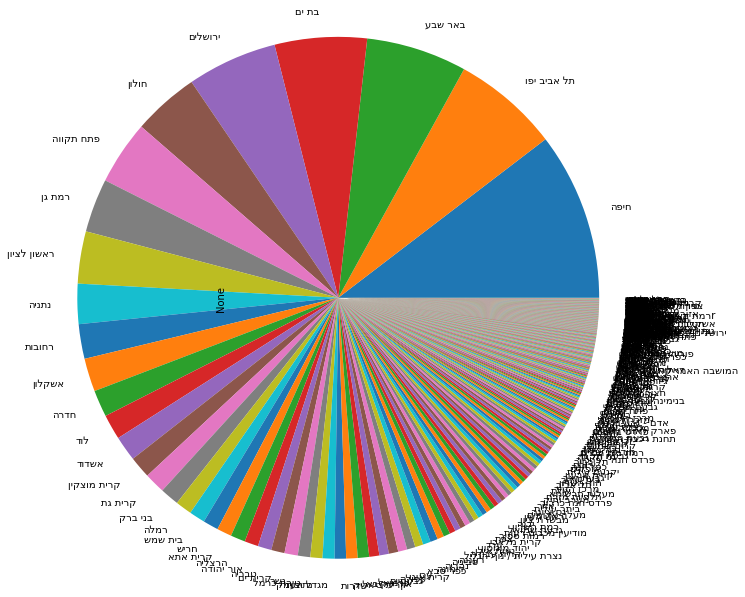

In [46]:
city_count = df['City'].value_counts()
reverse_cities_names = []
for name, value in city_count.items():
    reverse_cities_names.append(name[::-1])
flipped = pd.Series(city_count.values, index=reverse_cities_names)
flipped.plot(kind='pie', radius=3)

<AxesSubplot:>

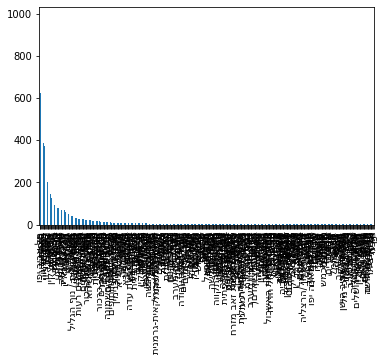

In [47]:
flipped.plot(kind='bar')

# Machine learning

#### Split label

In [128]:
y = df['Price']
X = df.drop(['Price'], axis=1)

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(X_train, X_test, y_train, y_test)

   Post link             City             Neighborhood  Size  Number of rooms  \
0   ru8q1kyv           סביניה                מרכז העיר   105                4   
1   lc0eawvk            אשדוד                  רובע ב'    68                3   
2   k5vqkej7             חיפה                 הדר מרכז    45                1   
3   c4jltnfv      תל אביב יפו             נאות אפקה ב'    90                3   
4   t37185rk           רחובות             חצרות המושבה   108                4   
6   exlooaxm        קרית אונו                   קיראון   109                4   
7   xxcek51n           רחובות      א' / צפון מזרח העיר   100                4   
8   j4a4mfrn          קרית גת                  כרמי גת   117                5   
9   4hsls8wu        גני ראשון                   רביבים   100               45   
10  diale51y        פתח תקווה   המרכז השקט / מרכז העיר    75                3   
11  pwgxqfep            חולון                  רסקו ב'    70                3   
12  7p528wch      קרית מוצקי

#### Scailing

In [130]:
def scale_features(X_train, scale_type):
    if(scale_type == 'minmax'):
         scaler=MinMaxScaler(feature_range=(0, 1))
    else:
        scaler=StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    return scaler, X_train_scaled

In [131]:
X_train2 = X_train.drop(['Post link','City','Neighborhood'], axis=1)
minmax_scaler, X_train_minmax_scaled = scale_features(X_train2, 'minmax')
standard_scaler, X_train_standard_scaled = scale_features(X_train2, 'standard')
print(standard_scaler, X_train_standard_scaled)

StandardScaler() [[ 1.225386   -0.2585681  -0.06800204  1.62274657  1.14707867  0.79349205
   1.14707867  0.          0.75592895 -0.66953406  0.83205029  1.26025208
   1.32287566  0.50709255  0.75592895  1.09544512]
 [-0.25783215 -0.35664565  0.30600918  0.26413162  1.14707867  0.79349205
   1.14707867  0.         -1.32287566 -0.66953406  0.83205029  1.26025208
   1.32287566  0.50709255  0.75592895  1.09544512]
 [-1.17983262 -0.55280076  0.6800204  -0.84499223  1.14707867  0.79349205
   1.14707867  0.         -1.32287566 -0.66953406  0.83205029  1.26025208
   1.32287566  0.50709255  0.75592895  1.09544512]
 [ 0.62408135 -0.35664565 -0.44201326         nan  1.14707867  0.79349205
   1.14707867  0.          0.75592895  1.49357599  0.83205029  1.26025208
   1.32287566  0.50709255  0.75592895  1.09544512]
 [ 1.34564694 -0.2585681   5.54216627         nan  1.14707867  0.79349205
   1.14707867  0.          0.75592895 -0.66953406  0.83205029  1.26025208
   1.32287566  0.50709255  0.75592895  

#### Complete the Scailing

In [132]:
def scale_test_features(X_test, scaler):
    return scaler.transform(X_test)

In [133]:
X_test2 = X_test.drop(['Post link','City','Neighborhood'], axis=1)
X_test_minmax_scaled = scale_test_features(X_test2, minmax_scaler)
X_test_standard_scaled = scale_test_features(X_test2, standard_scaler)
print(X_test_standard_scaled)

[[-0.17765819  2.78183608  0.30600918  1.32632149 -0.87177979  0.79349205
  -0.87177979  0.          0.75592895  1.49357599 -1.20185043  1.26025208
  -0.75592895  0.50709255  0.75592895 -0.91287093]
 [-0.17765819  2.78183608  0.30600918  1.32632149 -0.87177979  0.79349205
  -0.87177979  0.          0.75592895  1.49357599 -1.20185043  1.26025208
  -0.75592895  0.50709255  0.75592895 -0.91287093]
 [-0.17765819  2.78183608  0.30600918  1.32632149 -0.87177979  0.79349205
  -0.87177979  0.          0.75592895  1.49357599 -1.20185043  1.26025208
  -0.75592895  0.50709255  0.75592895 -0.91287093]
 [-0.01731029 -0.35664565 -0.06800204  0.38764207 -0.87177979  0.79349205
  -0.87177979  0.          0.75592895 -0.66953406  0.83205029 -0.79349205
  -0.75592895  0.50709255  0.75592895 -0.91287093]
 [-0.21774517  2.78183608 -0.06800204 -0.84746244 -0.87177979  0.79349205
  -0.87177979  0.          0.75592895 -0.66953406 -1.20185043 -0.79349205
  -0.75592895  0.50709255  0.75592895 -0.91287093]
 [-1.

#### Train a classification model

In [134]:
X_train2.describe()

,Size,Number of rooms,Floor number,Taxes,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
count,44.000000,44.000000,44.000000,41.000000,44.000000,44.000000,44.000000,44.0,44.000000,42.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,74.431818,6.636364,2.181818,343.073171,0.431818,0.613636,0.431818,1.0,0.636364,0.309524,0.590909,0.386364,0.363636,0.795455,0.636364,0.454545
std,25.234157,10.313890,2.704628,409.853107,0.501056,0.492545,0.501056,0.0,0.486607,0.467901,0.497350,0.492545,0.486607,0.408032,0.486607,0.503686
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,75.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,90.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,130.000000,45.000000,17.000000,1200.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
np.isfinite(X_train2)

,Size,Number of rooms,Floor number,Taxes,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True


In [136]:
X_train2.head()

,Size,Number of rooms,Floor number,Taxes,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,105,4,2,1000.0,1,1,1,1,1,0.0,1,1,1,1,1,1
1,68,3,3,450.0,1,1,1,1,0,0.0,1,1,1,1,1,1
2,45,1,4,1.0,1,1,1,1,0,0.0,1,1,1,1,1,1
3,90,3,1,NaN,1,1,1,1,1,1.0,1,1,1,1,1,1
4,108,4,17,NaN,1,1,1,1,1,0.0,1,1,1,1,1,1


In [138]:
X_train2.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train2 = np.nan_to_num(X_train2)

In [142]:
X_train2.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [141]:
print(np.any(np.isnan(X_train2)))
print(np.any(np.isfinite(X_train2)))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [51]:
def train_classifier(X_train, y_train):
    return LinearRegression().fit(X_train, y_train)

In [53]:
classification_model = train_classifier(X_train2, y_train)
classification_minmax_model = train_classifier(X_train_minmax_scaled, y_train)
classification_standard_model = train_classifier(X_train_standard_scaled, y_train)
print(type(classification_model))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Predict